# Chap 11 - Demo 1: Use petal length and petal width to classify iris data, use KMeansClustering

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

np.set_printoptions(suppress = True)

In [43]:
iris = pd.read_excel('Iris.xls')

iris

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [45]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [47]:
inputs = iris[['petallength', 'petalwidth']]

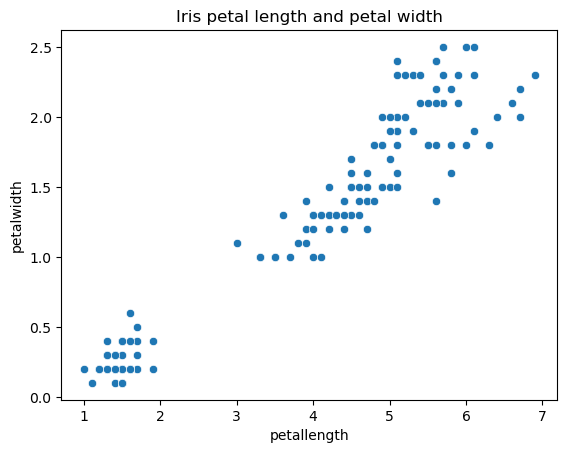

In [49]:
sbn.scatterplot(data = inputs, x = 'petallength', y = 'petalwidth')
plt.title('Iris petal length and petal width')
plt.show()

## <span style = 'color:yellow'> Build KMeansClustering model

D:\soft tc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\soft tc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\soft tc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\soft tc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

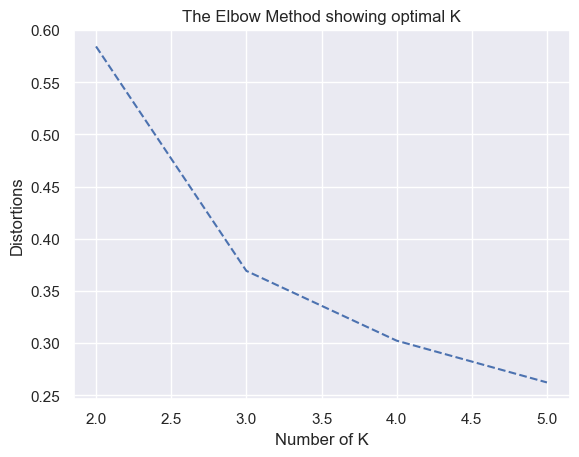


Choose K = 3


In [87]:
# Find optimal k using Elbow Method
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

distortions = []
k_nums = range(2,6)

for k in k_nums:
    kmeansModel = KMeans(n_clusters = k)
    kmeansModel.fit(inputs)
    distortions.append(sum(np.min(cdist(inputs, kmeansModel.cluster_centers_, 'euclidean'), axis = 1)) / inputs.shape[0])

sbn.set_theme(style = 'darkgrid')
sbn.lineplot(x = k_nums, y = distortions, linestyle = '--')
plt.xlabel('Number of K')
plt.ylabel('Distortions')
plt.title('The Elbow Method showing optimal K')
plt.show()

print('\nChoose K = 3')

In [101]:
# Build official KMeansClustering with K = 3

kmeansModel = KMeans(n_clusters = 3).fit(inputs)
centroids = kmeansModel.cluster_centers_
labels = kmeansModel.labels_

print('Coordinates of all centroids:\n', centroids)

inputs_group = inputs.copy()
inputs_group.insert(2, 'Group', labels)

inputs_group

Coordinates of all centroids:
 [[4.29259259 1.35925926]
 [1.464      0.244     ]
 [5.62608696 2.04782609]]


D:\soft tc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,petallength,petalwidth,Group
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


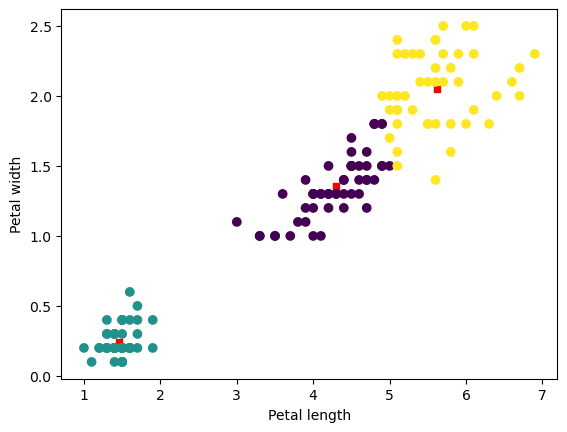

In [99]:
sbn.reset_orig()
plt.scatter(centroids[:,0], centroids[:,1], marker = 's', s = 15, color = 'red')
plt.scatter(inputs_group['petallength'], inputs_group['petalwidth'], c = inputs_group['Group'])
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

# Describe results:
## Group 0: PL < 2; PW < 0.6
## Group 1: 2 < PL < 5; 0.6 < PW < 1.8
## Group 2: PL > 5; PW > 1.8